#### Importing the required Libraries

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

#### Reading the necessary datasets

In [10]:

#Recipes_Dataset

# Load in csv
recipes_df = pd.read_csv("./Sush_Resources/RAW_recipes.csv")
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [12]:

#Recipes_Dataset

# Load in csv
interaction_df = pd.read_csv("./Sush_Resources/RAW_interactions.csv")
interaction_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


## cleaning the dataset

In [13]:
recipes_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [14]:
recipes_df.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

In [15]:
#the date is a string converting that into the right format
#from datetime import datetime
# creating a new column, date_parsed, with the parsed dates
recipes_df['submitted_parsed'] = pd.to_datetime(recipes_df['submitted'], format = "%Y/%m/%d")
recipes_df.dtypes


name                        object
id                           int64
minutes                      int64
contributor_id               int64
submitted                   object
tags                        object
nutrition                   object
n_steps                      int64
steps                       object
description                 object
ingredients                 object
n_ingredients                int64
submitted_parsed    datetime64[ns]
dtype: object

In [16]:
#checking if there are missing values
recipes_df.count()

name                231636
id                  231637
minutes             231637
contributor_id      231637
submitted           231637
tags                231637
nutrition           231637
n_steps             231637
steps               231637
description         226658
ingredients         231637
n_ingredients       231637
submitted_parsed    231637
dtype: int64

In [17]:
#dropping all rows with missing information
recipes_df = recipes_df.dropna(how='any')
recipes_df.count()

name                226657
id                  226657
minutes             226657
contributor_id      226657
submitted           226657
tags                226657
nutrition           226657
n_steps             226657
steps               226657
description         226657
ingredients         226657
n_ingredients       226657
submitted_parsed    226657
dtype: int64

In [18]:
#dropping all rows with missing information
interaction_df.count()
interaction_df=interaction_df.dropna(how='any')
interaction_df.count()

user_id      1132198
recipe_id    1132198
date         1132198
rating       1132198
review       1132198
dtype: int64

In [19]:
#adding parsed date to interactions
interaction_df['date_parsed'] = pd.to_datetime(interaction_df['date'], format = "%Y/%m/%d")
interaction_df.dtypes

user_id                 int64
recipe_id               int64
date                   object
rating                  int64
review                 object
date_parsed    datetime64[ns]
dtype: object

In [20]:
recipes_df=recipes_df.rename(columns={'id': 'recipe_id'})
recipes_df.head()

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,submitted_parsed
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,2005-09-16
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,2002-06-17
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,2005-02-25
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,2003-04-14
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,2002-10-25


## Plotting and Analysis

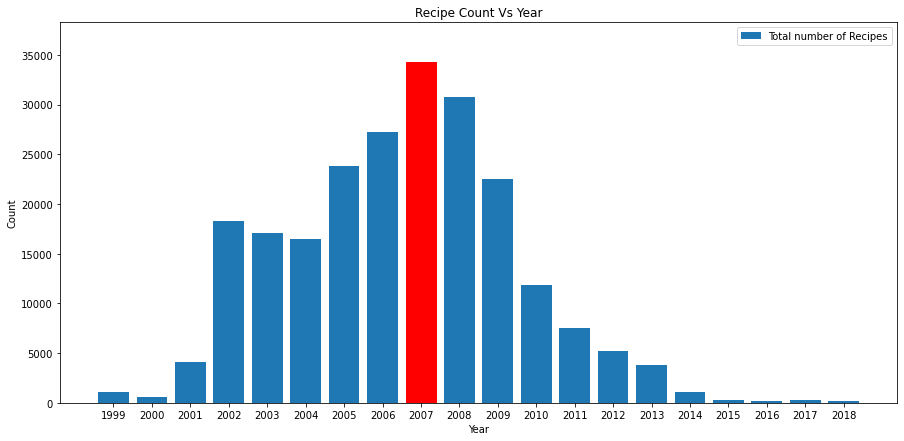

In [21]:
#grouping by recipes and finding when there were a lot of recipes posted
year_vs_count=pd.DataFrame(recipes_df.groupby(recipes_df['submitted_parsed'].dt.year).count()['recipe_id'])

#plotting
# Generate a bar plot showing the total number of recipes posted.

#fixing the figure size
plt.figure(figsize=(15,7))

#list of x axis values
xaxis=year_vs_count.index
#print(xaxis)

#plotting using pyplot
barlist=plt.bar(xaxis, year_vs_count['recipe_id'], align="center")

#title,labels,setting limits and adding legnds
plt.title('Recipe Count Vs Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.ylim(0,max(year_vs_count['recipe_id'])+4000)
plt.legend(['Total number of Recipes'], loc="best")
plt.xticks(xaxis,[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
barlist[8].set_color('r')
plt.show()


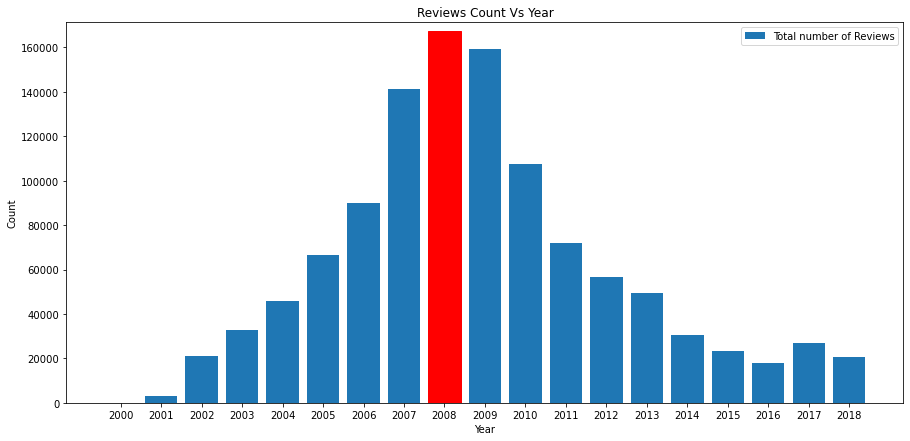

In [22]:
#grouping by reviews and finding when there which year has a lot of recipes posted
year_vs_count_reviews=pd.DataFrame(interaction_df.groupby(interaction_df['date_parsed'].dt.year).count()['recipe_id'])
year_vs_count_reviews

#plotting
# Generate a bar plot showing the total number of reviews posted.

#fixing the figure size
plt.figure(figsize=(15,7))

#list of x axis values
xaxis=year_vs_count_reviews.index
#print(xaxis)

#plotting using pyplot
barlist=plt.bar(xaxis, year_vs_count_reviews['recipe_id'], align="center")

#title,labels,setting limits and adding legnds
plt.title('Reviews Count Vs Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.ylim(0,max(year_vs_count_reviews['recipe_id'])+4000)
plt.legend(['Total number of Reviews'], loc="best")
plt.xticks(xaxis,[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
barlist[8].set_color('r')
plt.show()

In [23]:
#grouping by recipe id to find the maximum reviews count and finding teh recipe that is reviewed maximum
count_of_reviews=interaction_df.groupby(interaction_df['recipe_id']).count()['user_id']
average_rating=interaction_df.groupby(interaction_df['recipe_id']).mean()['rating']
recipe_reviews_df=pd.DataFrame({'total reviews': count_of_reviews,
                               'average rating':average_rating})
recipe_reviews_df

,total reviews,average rating
recipe_id,,
38,4,4.250000
39,1,3.000000
40,9,4.333333
41,2,4.500000
43,1,1.000000
...,...,...
537459,1,5.000000
537485,1,5.000000
537543,1,0.000000


In [24]:
#merging the reviews dataframe with the recipes by id

recipe_reviews_df=recipe_reviews_df.merge(recipes_df,on='recipe_id',how='left')
recipe_reviews_df=recipe_reviews_df.dropna()
recipe_reviews_df.count()

recipe_id           226650
total reviews       226650
average rating      226650
name                226650
minutes             226650
contributor_id      226650
submitted           226650
tags                226650
nutrition           226650
n_steps             226650
steps               226650
description         226650
ingredients         226650
n_ingredients       226650
submitted_parsed    226650
dtype: int64

In [25]:
#finding recipes that has 300+reviews and ratings greater than 4.5
top_rated_recipes=recipe_reviews_df.loc[(recipe_reviews_df['average rating']>=4.5)& (recipe_reviews_df['total reviews']>=500)]
top_rated_recipes['name']=top_rated_recipes['name'].str.title()


<ipython-input-25-d7a6c9f1508f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rated_recipes['name']=top_rated_recipes['name'].str.title()


In [26]:
top_rated_recipes=top_rated_recipes.reset_index(drop=True)
top_rated_recipes=top_rated_recipes.sort_values(by=['total reviews'],ascending=False)

#top 15 recipes
top_rated_recipes[['recipe_id','name','total reviews']]

,recipe_id,name,total reviews
6,39087,Creamy Cajun Chicken Pasta,1448
5,32204,Whatever Floats Your Boat Brownies,1220
9,69173,Kittencal S Italian Melt In Your Mouth Meatballs,997
11,82102,Kittencal S Moist Cheddar Garlic Oven Fried Ch...,855
3,28148,Oven Fried Chicken Chimichangas,802
8,63689,My Family S Favorite Sloppy Joes Pizza Joes,720
13,150863,Panera S Cream Cheese Potato Soup,714
10,77397,Kittencal S 5 Minute Cinnamon Flop Brunch Cake,627
4,29679,Reeses Squares 5 Ingredients No Bake Reese S,596
1,4627,Chicken Tortilla Soup Ii,591


In [27]:
recipes_25_reviews=recipe_reviews_df.loc[recipe_reviews_df['total reviews']>=25]

Calories=[]
total_fat=[]
sugar=[]
sodium=[]
protein=[]

for index,rows in recipes_25_reviews.iterrows():
    nutri=rows['nutrition'].strip('][').split(', ')
    Calories.append(nutri[0])
    total_fat.append(nutri[1])
    sugar.append(nutri[2])
    sodium.append(nutri[3])
    protein.append(nutri[4])
    
    
recipes_25_reviews["Calories"]=Calories
recipes_25_reviews['Total Fat']=total_fat
recipes_25_reviews['sugar']=sugar
recipes_25_reviews['sodium']=sodium
recipes_25_reviews['protein']=protein

recipes_25_reviews["Calories"]=pd.to_numeric(recipes_25_reviews["Calories"])
recipes_25_reviews["Total Fat"]=pd.to_numeric(recipes_25_reviews["Total Fat"])
recipes_25_reviews["sugar"]=pd.to_numeric(recipes_25_reviews["sugar"])
recipes_25_reviews["sodium"]=pd.to_numeric(recipes_25_reviews["sodium"])
recipes_25_reviews["protein"]=pd.to_numeric(recipes_25_reviews["protein"])

recipes_25_reviews.head()





<ipython-input-27-c7d02a439699>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_25_reviews["Calories"]=Calories
<ipython-input-27-c7d02a439699>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_25_reviews['Total Fat']=total_fat
<ipython-input-27-c7d02a439699>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,recipe_id,total reviews,average rating,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,submitted_parsed,Calories,Total Fat,sugar,sodium,protein
59,153,48,3.791667,amish friendship bread and starter,70.0,1540.0,1999-09-06,"['time-to-make', 'course', 'cuisine', 'prepara...","[615.9, 32.0, 260.0, 15.0, 16.0, 19.0, 33.0]",19.0,"['place one cup each sugar , milk , and flour ...",many recipes have been posted for the amish br...,"['sugar', 'milk', 'flour', 'oil', 'eggs', 'van...",12.0,1999-09-06,615.9,32.0,260.0,15.0,16.0
82,192,29,4.689655,classic cream scones,85.0,1609.0,1999-08-13,"['weeknight', 'time-to-make', 'course', 'prepa...","[168.2, 12.0, 28.0, 3.0, 5.0, 24.0, 7.0]",20.0,"['preheat oven to 425f', 'lightly butter a bak...",you're best off describing scones to a german ...,"['all-purpose flour', 'granulated sugar', 'bak...",9.0,1999-08-13,168.2,12.0,28.0,3.0,5.0
87,198,49,4.367347,chinese hot and sour pork soup,40.0,1545.0,1999-09-18,"['60-minutes-or-less', 'time-to-make', 'course...","[368.7, 20.0, 41.0, 60.0, 63.0, 14.0, 10.0]",11.0,"['bring stock to a simmer', 'add soy sauce , p...",edited recipe from other viewers recomendations,"['chicken stock', 'lean pork', 'garlic and red...",17.0,1999-09-18,368.7,20.0,41.0,60.0,63.0
112,246,65,4.615385,lee s hot crab dip,45.0,25843.0,1999-09-01,"['60-minutes-or-less', 'time-to-make', 'course...","[180.7, 23.0, 7.0, 16.0, 16.0, 40.0, 1.0]",8.0,"['remove cartilage from crab meat', 'in a larg...",lee's hot crab dip,"['crabmeat', 'cream cheese', 'sour cream', 'ma...",10.0,1999-09-01,180.7,23.0,7.0,16.0,16.0
168,346,30,4.433333,potatoes tapas in garlic mayonnaise potatoes ...,20.0,1589.0,1999-08-18,"['30-minutes-or-less', 'time-to-make', 'course...","[184.2, 15.0, 10.0, 8.0, 4.0, 7.0, 7.0]",4.0,"['boil potatoes in salt water until tender', '...","""tapas, the little dishes of spain"" by penelop...","['salad potatoes', 'mayonnaise', 'garlic clove...",5.0,1999-08-18,184.2,15.0,10.0,8.0,4.0


<AxesSubplot:xlabel='n_steps', ylabel='Count'>

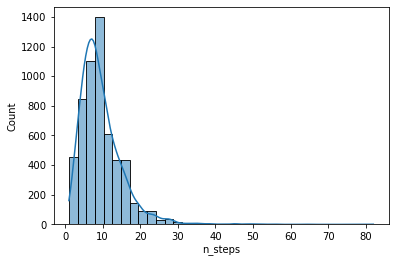

In [28]:
#plotting no of steps
sns.histplot(data=recipes_25_reviews, x="n_steps",kde=True,bins=35)

<AxesSubplot:xlabel='average rating', ylabel='Count'>

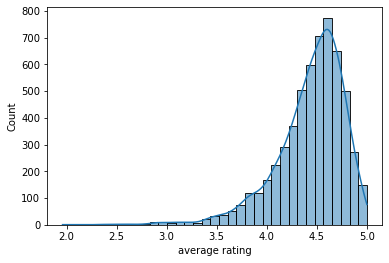

In [29]:
#plotting for ratings
sns.histplot(data=recipes_25_reviews, x="average rating",kde=True,bins=35)

<AxesSubplot:xlabel='n_ingredients', ylabel='Count'>

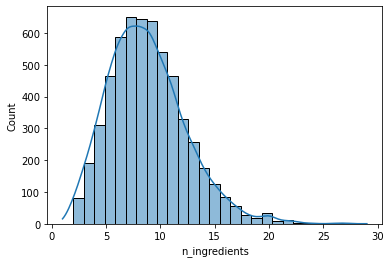

In [30]:
#plotting for ingredients
sns.histplot(data=recipes_25_reviews, x="n_ingredients",bins=29,kde=True)

<AxesSubplot:xlabel='Calories', ylabel='Count'>

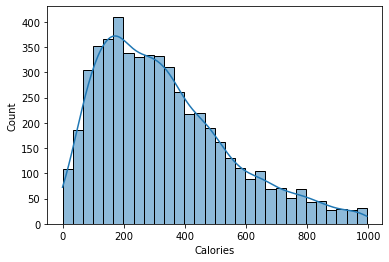

In [31]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.      
quartiles = recipes_25_reviews['Calories'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers=recipes_25_reviews.loc[(recipes_25_reviews['Calories']>lower_bound) & (recipes_25_reviews['Calories']<upper_bound)]
sns.histplot(data=outliers, x="Calories",bins=30,kde=True)

The median Calories is : 312.1


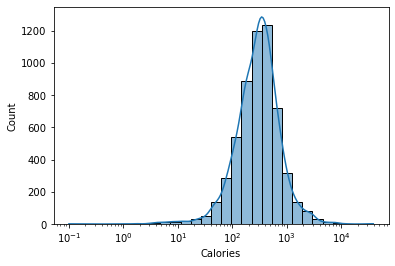

In [32]:
#corecting the scale
sns.histplot(data=recipes_25_reviews, x="Calories",bins=30,kde=True,log_scale=True)
median_Cal=recipes_25_reviews['Calories'].median()
print(f"The median Calories is : {median_Cal}")

<AxesSubplot:>

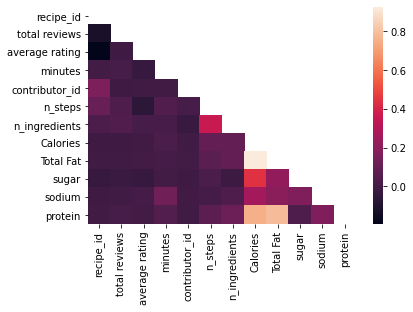

In [33]:
#correlation plot to see the relationship between the variables
correlation=recipes_25_reviews.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation,mask=mask)

In [34]:
#converting the ingrideints into list
ingredients=recipes_25_reviews['ingredients']
ingredient_list=[]
for i in ingredients:
    ingri=i.strip('][').split(', ')
    ingredient_list.append(ingri)
recipes_25_reviews['ingredients']=ingredient_list


<ipython-input-34-7412744159c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes_25_reviews['ingredients']=ingredient_list


In [35]:
#resetting index
recipes_25_reviews=recipes_25_reviews.reset_index(drop=True)
ing_list=[]
all_ingridients=[]
for index,rows in recipes_25_reviews.iterrows():
    ing_list=rows['ingredients']
    for ing in ing_list:
        ing=ing.lower()
        all_ingridients.append(ing)
    
        

In [36]:
ingridients_df=pd.DataFrame({'Ingridient':all_ingridients})
value=ingridients_df['Ingridient'].value_counts()
ingredients_count_df=pd.DataFrame({'Ingredient':value.index,
                                  'Count':value.values})
ingredients_count_df.sort_values(by=['Count'],ascending=False)
top_10=ingredients_count_df.head(10)
top_10


,Ingredient,Count
0,'salt',2561
1,'butter',1645
2,'sugar',1265
3,'water',1027
4,'onion',966
5,'eggs',949
6,'flour',876
7,'milk',747
8,'olive oil',711
9,'brown sugar',607


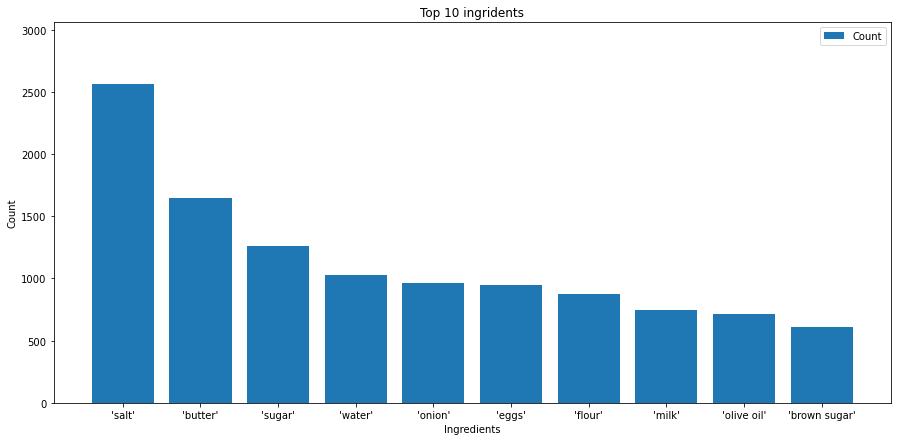

In [37]:
#fixing the figure size
plt.figure(figsize=(15,7))

#list of x axis values
xaxis=top_10['Ingredient']
#print(xaxis)

#plotting using pyplot
barlist=plt.bar(xaxis, top_10['Count'], align="center")

#title,labels,setting limits and adding legnds
plt.title('Top 10 ingridents')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.ylim(0,max(top_10['Count'])+500)
plt.legend(['Count'], loc="best")
#plt.xticks(xaxis,xaxis)
#barlist[8].set_color('r')
plt.show()